In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

# Overfitting and Underfitting


- Underfitting: machine learning models learn from certain subset of dataset
- Overfitting: machine learning models learn from the entire dataset
- Both will fail if entirely new dataset is presented

![Difference](img/overfitting_vs_underfitting.png)

## Data load

In [69]:
df_analyse = pd.read_csv('../data/processed/COVID_small_sync_timeline_table.csv',sep=';')

df_analyse.sort_values('date', ascending = True).head()

,doubling every 2 days,doubling every 4 days,doubling every 10 days,Italy,US,Spain,Germany,"Korea, South",date
0,100.000000,100.000000,100.000000,155.0,118.0,120.0,130.0,104.0,0
1,141.421356,118.920712,107.177346,229.0,149.0,165.0,159.0,204.0,1
2,200.000000,141.421356,114.869835,322.0,217.0,222.0,196.0,433.0,2
3,282.842712,168.179283,123.114441,453.0,262.0,259.0,262.0,602.0,3
4,400.000000,200.000000,131.950791,655.0,402.0,400.0,482.0,833.0,4


In [70]:
#country_list = df_analyse.columns[4:9]
#country_list

## Helper functions

In [71]:
def quick_plot(x_in, df_input, y_scale = 'log', slider = False):
    fig = go.Figure()
    
    for each in df_input.columns:
        fig.add_trace(go.Scatter(# data
        x = x_in,
        y = df_input[each],
        name = each,
        opacity = 0.8))
    fig.update_layout(autosize = True,# overall graph layout
                     width = 1024,
                     height = 768,
                     font = dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type = y_scale)# if log or linear is updated here
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    
    if slider == True:
        fig.update_layout(xaxis_rangeslider_visible = True)
    fig.show()

In [80]:
quick_plot(df_analyse.date,
          df_analyse.iloc[:,3:-1],
          y_scale = 'log',
          slider = True)

## Fitting a polynomial curve

- Interpolation: interpolation between two points is a straight line

In [73]:
# adds a new index
df_poly_check = df_analyse.iloc[0:27, 3:-1].reset_index()
df_poly_check.head()

,index,Italy,US,Spain,Germany,"Korea, South"
0,0,155.0,118.0,120.0,130.0,104.0
1,1,229.0,149.0,165.0,159.0,204.0
2,2,322.0,217.0,222.0,196.0,433.0
3,3,453.0,262.0,259.0,262.0,602.0
4,4,655.0,402.0,400.0,482.0,833.0


In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):# kwargs - takes any dictionary: keys and values
    # make_pipeline first does PolynomialFeatures and further steps if given in a sequential way
    return make_pipeline(PolynomialFeatures(degree),# transforming data to polynomials
                        LinearRegression(**kwargs))

In [81]:
# Constructing a target vector
y = df_poly_check[['Germany', 'Italy', 'US', 'Spain']].unstack().sort_index(axis = 0, level = 1)

In [82]:
y.head()

Germany  0    130.0
Italy    0    155.0
US       0    118.0
Spain    0    120.0
Germany  1    159.0
dtype: float64

In [124]:
test_points = 28
y_train = y[0:-test_points-1]
y_train

Germany  0       130.0
Italy    0       155.0
US       0       118.0
Spain    0       120.0
Germany  1       159.0
Italy    1       229.0
US       1       149.0
Spain    1       165.0
Germany  2       196.0
Italy    2       322.0
US       2       217.0
Spain    2       222.0
Germany  3       262.0
Italy    3       453.0
US       3       262.0
Spain    3       259.0
Germany  4       482.0
Italy    4       655.0
US       4       402.0
Spain    4       400.0
Germany  5       670.0
Italy    5       888.0
US       5       518.0
Spain    5       500.0
Germany  6       799.0
Italy    6      1128.0
US       6       583.0
Spain    6       673.0
Germany  7      1040.0
Italy    7      1694.0
US       7       959.0
Spain    7      1073.0
Germany  8      1176.0
Italy    8      2036.0
US       8      1281.0
Spain    8      1695.0
Germany  9      1457.0
Italy    9      2502.0
US       9      1663.0
Spain    9      2277.0
Germany  10     1908.0
Italy    10     3089.0
US       10     2179.0
Spain    10

In [123]:
y_test = y[-test_points:]
y_test

Germany  20     22213.0
Italy    20     21157.0
US       20     43843.0
Spain    20     28768.0
Germany  21     24873.0
Italy    21     24747.0
US       21     53736.0
Spain    21     35136.0
Germany  22     29056.0
Italy    22     27980.0
US       22     65778.0
Spain    22     39885.0
Germany  23     32986.0
Italy    23     31506.0
US       23     83836.0
Spain    23     49515.0
Germany  24     37323.0
Italy    24     35713.0
US       24    101657.0
Spain    24     57786.0
Germany  25     43938.0
Italy    25     41035.0
US       25    121465.0
Spain    25     65719.0
Germany  26     50871.0
Italy    26     47021.0
US       26    140909.0
Spain    26     73235.0
dtype: float64

In [128]:
X_train = np.arange(len(y_train)).reshape(-1,1)/4.0
# np.arange(start, stop)
X_test = np.arange(len(y_train), len(y_train)+test_points).reshape(-1,1)/4.0

In [134]:
len(y_train)

79

In [135]:
test_points

28

In [131]:
X_train

array([[ 0.  ],
       [ 0.25],
       [ 0.5 ],
       [ 0.75],
       [ 1.  ],
       [ 1.25],
       [ 1.5 ],
       [ 1.75],
       [ 2.  ],
       [ 2.25],
       [ 2.5 ],
       [ 2.75],
       [ 3.  ],
       [ 3.25],
       [ 3.5 ],
       [ 3.75],
       [ 4.  ],
       [ 4.25],
       [ 4.5 ],
       [ 4.75],
       [ 5.  ],
       [ 5.25],
       [ 5.5 ],
       [ 5.75],
       [ 6.  ],
       [ 6.25],
       [ 6.5 ],
       [ 6.75],
       [ 7.  ],
       [ 7.25],
       [ 7.5 ],
       [ 7.75],
       [ 8.  ],
       [ 8.25],
       [ 8.5 ],
       [ 8.75],
       [ 9.  ],
       [ 9.25],
       [ 9.5 ],
       [ 9.75],
       [10.  ],
       [10.25],
       [10.5 ],
       [10.75],
       [11.  ],
       [11.25],
       [11.5 ],
       [11.75],
       [12.  ],
       [12.25],
       [12.5 ],
       [12.75],
       [13.  ],
       [13.25],
       [13.5 ],
       [13.75],
       [14.  ],
       [14.25],
       [14.5 ],
       [14.75],
       [15.  ],
       [15.25],
       [

In [132]:
X_test

array([[19.75],
       [20.  ],
       [20.25],
       [20.5 ],
       [20.75],
       [21.  ],
       [21.25],
       [21.5 ],
       [21.75],
       [22.  ],
       [22.25],
       [22.5 ],
       [22.75],
       [23.  ],
       [23.25],
       [23.5 ],
       [23.75],
       [24.  ],
       [24.25],
       [24.5 ],
       [24.75],
       [25.  ],
       [25.25],
       [25.5 ],
       [25.75],
       [26.  ],
       [26.25],
       [26.5 ]])

In [100]:
# Statistical data visualisation
import seaborn
seaborn.set(rc={'figure.figsize':(16,8)})

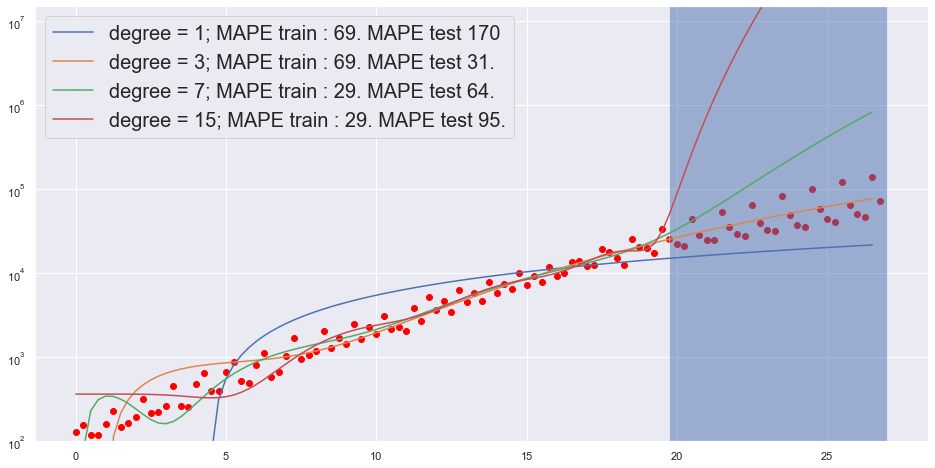

In [175]:
fig, axl = plt.subplots(1,1)
# different points of contries at a distance of 0,25(len(y)) from each other
axl.scatter(np.arange(len(y))/4, y, color = 'red')
# Add a vertical span (rectangle) across the axes
# Differentiate train and test data
axl.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor = 'b', alpha = 0.5)

for degree in [1, 3, 7, 15]:
    # https://www.youtube.com/watch?v=Qnt2vBRW8Io
    # X_train is the x-axis index
    y_hat_insaple = PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test) # predicting on the test_data
    
    X_plot = np.concatenate((X_train, X_test), axis = None)
    y_plot = np.concatenate((y_hat_insaple, y_hat_test), axis = None)
    # https://www.youtube.com/watch?v=ZejnwbcU8nw
    axl.plot(X_plot, y_plot, label = 'degree = {0}; '.format(degree) + 
            'MAPE train : ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:3]
             +' MAPE test ' + str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3])

axl.set_ylim(100, 15000000)
axl.set_yscale('log')
axl.legend(loc = 'best',
          prop = {'size' :20})


In [176]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 # dividing to normalize to the original point